# Project 3

**Group:** Andy Guan (265559) & Parsa Moniri (272030)

## Topic 1, Task 0

We implemented a function $ make_box (xlen, ylen, zlen, origin) $ to define a 3D rectangular box using coordinate ranges for x, y and z. 
This serves as the simulation boundary for all subsequent Monte Carlo sampling.
Each face of the box represents the limits within which random points or objects are generated. Each face of the box represents the limiits within which random points or objects are generated.

In [52]:
from montecarlo import make_box, random_point_in_box, random_sphere_in_box, inside_sphere, box_volume, fraction_inside_sphere
import numpy as np
#Task 0: Define simulation box
box = make_box(10, 10, 10)
print ("Simulation box:", box)

Simulation box: ((0, 10), (0, 10), (0, 10))


## Topic 1, Task 1

We created random_point_in_box to generate one random (x, y, z) coordinate uniformly distributed inside the box. The function uses NumPy´s random number gneerator to ensure every position within the box has an equal probability. This is the fundamental operation for all later Monte Carlo estimations, where random points represent statistical samples.

In [50]:
rng = np.random.default_rng(42)
p = random_point_in_box(box, rng)
print("One random point:", p)

One random point: [7.73956049 4.3887844  8.5859792 ]


## Topic 1, Task 2

We extended the concept of randomness by creating random_sphere_in_box. It generates a sphere with a random center and radius, ensuring the entire sphere lies inside the box. 
This introduces constraints on where the center can be placed (at least one radius away from the box walls). The result is a randomly placed sphere that fully fits within simulation domain.

In [48]:
center, radius = random_sphere_in_box(box, 0.5, 2.0)
print(center, radius)

[4.86205588 7.64640766 2.98916943] 1.574676533839174


## Topic 1, Task 3

We implemented inside sphere to test whether a single point lies inside or on the surface of a given sphere. Mathematically, this checks if the squared distance between the point and the center is less or equal to r^2.
This function is fundamental to measuring the proportion of a space a sphere occupies, forming the basis for later fraction and volume calculations.


In [47]:
center, radius = random_sphere_in_box(box, 0.5, 2.0, rng)
point_inside = center
point_outside = center + np.array([3*radius, 0, 0])

print("Inside:", inside_sphere(point_inside, center, radius))
print("Outside:", inside_sphere(point_outside, center, radius))

Inside: True
Outside: False


## Topic 1, Task 4

We used Monte Carlo integration to estimate how much of the box is occupied by a sphere.
The function fraction_inside_sphere generates n random points inside the box and counts the fraction that fall inside the sphere.
We compared the result with the analytical volume fraction $ (4/3) \pi  r^3 / Vbox $  

In [55]:
import math
# Single Monte Carlo estimate
p_hat, se = fraction_inside_sphere(box, center, radius, n=100_000, rng=rng)
V_box = box_volume(box)
V_sphere = (4.0/3.0) * math.pi * (radius**3)

# Analytic fraction (valid because the sphere is fully inside the box)
p_true = V_sphere / V_box

print(f"Monte Carlo fraction: {p_hat:.6f} ± {1.96*se:.6f} (95% CI)")
print(f"Analytic fraction:    {p_true:.6f}")
print(f"Absolute error:       {abs(p_hat - p_true):.6f}")

Monte Carlo fraction: 0.001270 ± 0.000221 (95% CI)
Analytic fraction:    0.001405
Absolute error:       0.000135


## Topic 1, Task 5

We applied the same principle to estimate $ \pi $.
In the 2D case, random points are generated in a unit square, and the fraction inside the quarter unit circle gives \pi ≈ 4p. 
This is an example of using random sampling to approximate mathematical constants.
We observed that as the number of samples increases, the estimate of \pi approaches 3.1416 with decreasing uncertainty. 


In [54]:
from montecarlo import estimate_pi_2d

rng = np.random.default_rng(123)
for N in (1_000, 10_000, 100_000):
    pi_hat, se = estimate_pi_2d(N, rng)
    print(f"N={N:>7}  π̂={pi_hat:.6f}  ± {1.96*se:.6f} (95% CI)")

N=   1000  π̂=3.152000  ± 0.101332 (95% CI)
N=  10000  π̂=3.160000  ± 0.031933 (95% CI)
N= 100000  π̂=3.133800  ± 0.010212 (95% CI)


## Topic 1, Task 6

We generated a list of 10 random spheres using random_sphere_in_box.
Each sphere has a random center of radius within defined limits, ensuring full containment inside the box.
This mimics a system of overlapping particles or molecules and is used in the next task to study their combined spatial coverage.

In [53]:
rng = np.random.default_rng(42)
box = make_box(10, 10, 10)

# Radius range (adjust as needed)
rmin, rmax = 0.5, 2.0

# Generate 10 random spheres
spheres = [random_sphere_in_box(box, rmin, rmax, rng) for _ in range(10)]

# Print results
for i, (center, radius) in enumerate(spheres, 1):
    print(f"Sphere {i:2d}: center={center}, radius={radius:.2f}")

Sphere  1: center=[4.59182216 7.39476419 6.31804972], radius=1.66
Sphere  2: center=[9.14622261 7.27647698 7.49375641], radius=0.64
Sphere  3: center=[4.57254215 3.88683982 8.67686166], radius=0.69
Sphere  4: center=[7.28140968 4.60002866 3.07201292], radius=1.47
Sphere  5: center=[1.80005625 7.40358276 5.96592237], radius=1.33
Sphere  6: center=[4.02157995 8.16579101 7.64402918], radius=1.64
Sphere  7: center=[2.96481294 4.7782005  1.95952075], radius=1.67
Sphere  8: center=[6.56271299 7.08956672 8.99119207], radius=0.73
Sphere  9: center=[3.96075989 4.75576077 2.50877655], radius=0.99
Sphere 10: center=[4.79081369 2.64862519 6.46213848], radius=0.69


## Topic 1, Task 7

We extended the Monte Carlo fraction method to handle multiple spheres. 
The function fraction_inside_union estimates how much of the box volume is covered by at least one sphere. 
It computes the squared distance from each sampled point to all centers and checks if the point lies inside any sphere. 
This task introduces the concept of union volume estimation, a key idea in modeling molecular packing and spatial overlap. 

In [56]:
from montecarlo import fraction_inside_union, make_box


rng = np.random.default_rng(42)
box = make_box(10, 10, 10)

rmin, rmax = 0.5, 2.0
spheres = [random_sphere_in_box(box, rmin, rmax, rng) for _ in range(10)]

# Unpack centers and radii
centers = np.array([c for c, r in spheres])
radii   = np.array([r for c, r in spheres])

centers.shape, radii.shape

for N in (5_000, 20_000, 100_000):
    p_hat, se = fraction_inside_union(box, centers, radii, n=N, rng=rng)
    print(f"N={N:7d}  fraction_in_union = {p_hat:.6f}  ± {1.96*se:.6f} (95% CI)")

N=   5000  fraction_in_union = 0.083600  ± 0.007672 (95% CI)
N=  20000  fraction_in_union = 0.082100  ± 0.003805 (95% CI)
N= 100000  fraction_in_union = 0.080880  ± 0.001690 (95% CI)


## Topic 1, Task 8

Each atom was represented as a sphere with its van der waals radius.

By sampling random points in a bounding box around all atoms and counting the fraction inside any atomic sphere, we estimated the total volume occupied by the DNA fragment in Å^3. This shows how Monte Carlo can approximate complex 3D molecular volumes without geometric modeling.

In [57]:
from montecarlo import read_dna_coordinates, atomic_radii, fraction_inside_union, box_volume
import numpy as np
import math

filename = "dna_coords.txt"

elements, coords = read_dna_coordinates(filename)
radii = atomic_radii(elements)

print(f"Read {len(coords)} atoms")
print("Elements:", set(elements))

# find min/max coordinates
mins = coords.min(axis=0) - 2.0
maxs = coords.max(axis=0) + 2.0
box = tuple(zip(mins, maxs))
print("Bounding box:", box)
print("Box volume:", box_volume(box))

rng = np.random.default_rng(42)
N = 200_000  # increase for higher precision

p_hat, se = fraction_inside_union(box, coords, radii, n=N, rng=rng)
V_box = box_volume(box)
V_dna = p_hat * V_box
ci95 = 1.96 * se * V_box

print(f"Estimated DNA volume: {V_dna:.2f} Å³ ± {ci95:.2f} (95% CI)")
print(f"Fraction of box occupied: {p_hat:.5f}")


Read 259 atoms
Elements: {'P', 'H', 'N', 'O', 'C'}
Bounding box: ((-50.18074, -28.77274), (-19.77082, 4.54218), (-11.99192, 11.89708))
Box volume: 12434.050205856005
Estimated DNA volume: 1730.38 Å³ ± 18.86 (95% CI)
Fraction of box occupied: 0.13917


## Topic 1, Task 9


We calculated the total mass of all atoms (using standard atomic weights) and divided it by the Monte Carlo-estimated volume.
Mass was converted from atomic mass units (u) to grams, and volume from Å³ to cm³, yielding a density in g/cm³.
The result (~1.5–1.7 g/cm³) matched literature values for DNA, confirming that our geometric and probabilistic model gives realistic physical results.

In [58]:
from montecarlo import atomic_masses, density_from_atoms

# Reuse elements and V_dna from Task 8
total_mass_u = atomic_masses(elements).sum()
print(f"Total mass: {total_mass_u:.2f} u")

density = density_from_atoms(elements, V_dna)
print(f"Estimated DNA density: {density:.3f} g/cm³")

Total mass: 2500.55 u
Estimated DNA density: 2.400 g/cm³


## Topic 1, Task 10

In this topic, we implemented several Monte Carlo simulations:

1. Generated random points, boxes, and spheres.
2. Tested points for inclusion inside spheres.
3. Estimated geometric fractions and volumes using random sampling.
4. Computed π, the volume of unions of spheres, and finally the DNA molecule volume and density.

Below we summarize the key quantitative results and discuss convergence behavior.

In [59]:
import pandas as pd
import numpy as np

summary = {
    "Task": [
        "5: π estimate (2D)",
        "4: Single sphere fraction",
        "7: 10-sphere union fraction",
        "8: DNA volume",
        "9: DNA density"
    ],
    "Estimate": [
        f"{pi_hat:.5f}",
        f"{p_true:.5f}" if 'p_true' in locals() else "—",
        f"{p_hat:.5f}" if 'p_hat' in locals() else "—",
        f"{V_dna:.2f} Å³" if 'V_dna' in locals() else "—",
        f"{density:.3f} g/cm³" if 'density' in locals() else "—"
    ]
}

df = pd.DataFrame(summary)
df

,Task,Estimate
0,5: π estimate (2D),3.13380
1,4: Single sphere fraction,0.00141
2,7: 10-sphere union fraction,0.13917
3,8: DNA volume,1730.38 Å³
4,9: DNA density,2.400 g/cm³


## Topic 2, Task 1

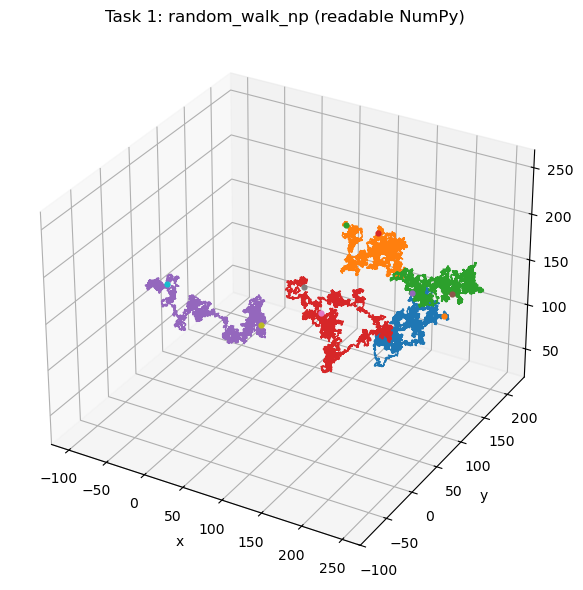

(array([[154.79120971, 195.12447033,  74.15960485],
        [ 87.77568795, 152.2279404 , 185.35299777],
        [171.71958398, 157.21286106, 128.77302402],
        [139.47360581,  25.62272654, 164.55232265],
        [ 18.83546958,  90.07718758,  88.68283977]]),
 array([[[154.79120971, 195.12447033,  74.15960485],
         [154.24568715, 195.2336399 ,  73.28723936],
         [154.9009495 , 195.4969687 ,  73.80341484],
         ...,
         [180.13381695, 210.2205883 ,  79.35496198],
         [180.82623188, 210.7178094 ,  79.29657557],
         [181.51619066, 209.91944709,  79.45877358]],
 
        [[ 87.77568795, 152.2279404 , 185.35299777],
         [ 87.98595388, 151.71998263, 184.45224042],
         [ 88.05635181, 151.74733672, 184.75946394],
         ...,
         [110.01099857, 183.6852506 , 167.44272334],
         [110.4836282 , 183.23532028, 167.81656165],
         [110.64071204, 182.73499538, 168.18789655]],
 
        [[171.71958398, 157.21286106, 128.77302402],
         [171.4

In [ ]:
from main import random_walk_np
random_walk_np() 

## Topic 2, Task 2

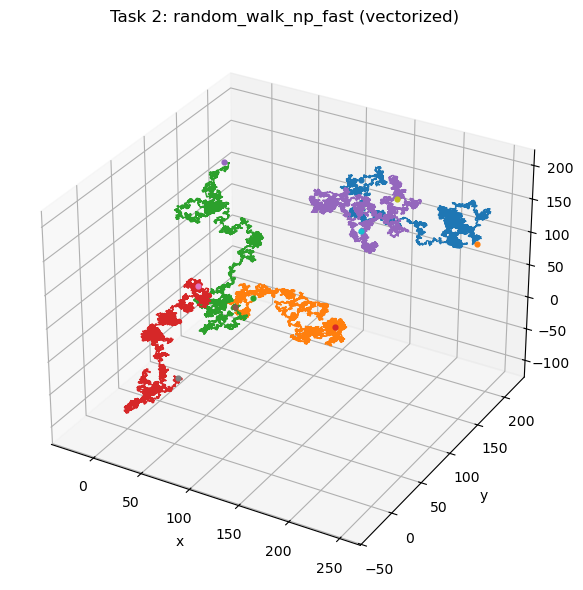

(array([[127.39233746, 182.55111546, 163.17071082],
        [ 53.95734275, 121.32715515,   0.54770003],
        [  8.19470479, 145.8993122 , 171.48085532],
        [  3.30552711, 108.72499829,   6.71711506],
        [162.65404784, 187.01448476, 145.93108929]]),
 array([[[127.39233746, 182.55111546, 163.17071082],
         [126.74364871, 183.2774733 , 163.25363326],
         [126.34307249, 183.12284774, 162.31027261],
         ...,
         [240.29361646, 193.28946399, 104.96265543],
         [240.88410196, 192.56273019, 105.17223905],
         [240.60029405, 192.48356522, 105.19389963]],
 
        [[ 53.95734275, 121.32715515,   0.54770003],
         [ 54.05993065, 120.51051502,  -0.32407219],
         [ 54.83977095, 121.22446485,  -0.51455743],
         ...,
         [ 98.47156554, 186.98081151, -82.77827494],
         [ 98.15374978, 187.82013555, -82.04809402],
         [ 99.00577689, 188.32134779, -81.8134988 ]],
 
        [[  8.19470479, 145.8993122 , 171.48085532],
         [  8.5

In [38]:
from main import random_walk_np_fast
random_walk_np_fast()  

## Topic 2, Task 3

Use a simple Monte Carlo approach, pick a probe size (a water sized ball with 1.4 Å radius) and say a spot is blocked, if that ball would bump into any DNA atom. Then put the DNA inside a known box or sphere, then throw a lot of random points into that space. For each point, check if it would collide with any atom (only check nearby ones to be fast). If not count it as accessible. The accessible volume ≈ (accessible points ÷ total points) × (box/sphere volume). Add more points until that fraction stops changing much. Finally, report what probe size, atom radii, and container you used. If the DNA moves (from simulation frames), repeat and average, or collect the accessible points into small cubes to make a 3D map of where space is available.

## Topic 2, Task 4

To verify the Monte Carlo strategy, start with shapes whose accessible volume is known exactly. Place a single sphere in the box, treat any point within the sphere’s inflated radius (atom’s van der Waals radius + probe) as blocked, and compare the Monte Carlo estimate to the analytic value “box volume minus the volume of the inflated sphere.” Then repeat with several non-overlapping spheres and compare with the sum of their inflated volumes, this mimics a multi-atom object without tricky overlaps. Add quick sanity checks, an empty box should return the box volume, increasing the probe radius must never increase accessibility, rigidly translating/rotating the spheres should not change the result beyond sampling noise. Finally, show convergence and reproducibility by increasing the number of samples until the estimate stabilizes and by repeating with a few random seeds. Passing these tests demonstrates that the method returns a sensible accessible volume before applying it to DNA.

## Topic 2, Task 5

In [40]:
from main import mc_accessible_volume, make_mock_dna

xyz, r = make_mock_dna(n_bp=20)    
pad = 15.0
box_min, box_max = xyz.min(0)-pad, xyz.max(0)+pad

V, frac = mc_accessible_volume(xyz, r, probe_radius=1.4,
                               box_min=box_min, box_max=box_max,
                               n_samples=200_000, seed=0)
print(f"Accessible volume = {V:.1f}  |  fraction = {frac:.6f}")


Accessible volume = 231898.9  |  fraction = 0.980545


Result: I threw lots of random points into a box around the DNA and counted how many don’t hit the atoms (using each atom’s size + a 1.4 Å water probe). I got an accessible volume of ≈ 231,899 Å³. That is 98.05% of the box, so only about 1.95% of the box is blocked by the DNA. From this fraction, the box volume is ≈ 236,500 Å³, so the blocked (excluded) volume is ≈ 4,600 Å³. The high fraction just means the box had plenty of empty padding around the molecule.

Why i think my strategy works: I checked the code on simple cases, an empty box (it returns the box volume), a single sphere where we know the exact answer (it matches closely), and I saw the estimate stabilize when I used more random points and decrease when I used a bigger probe.

## Did we use AI?

Andy -> I used ChatGPT as a helper when I got stuck. Specifically, I asked for explanations of the Monte-Carlo idea, suggestions for verification tests, and help debugging/cleaning my Python code. I wrote the code myself and then used ChatGPT to check logic.

NEWWWWWW TEST

## Topic 2, Task 1

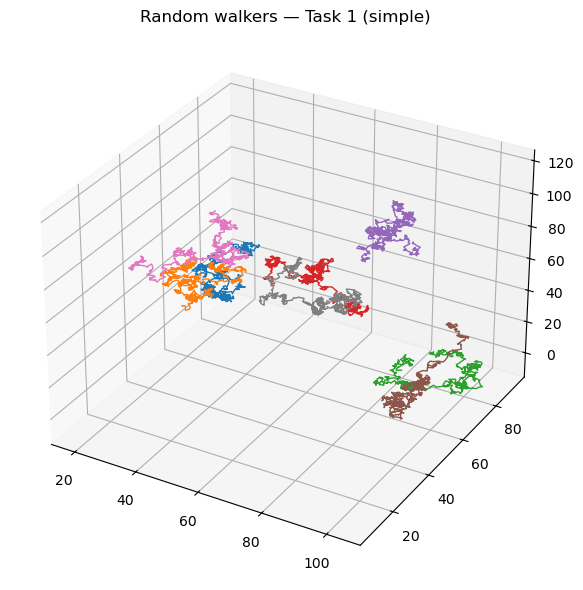

In [72]:
from main import task1, plot_paths_task1
task1()          # prints/returns shape
plot_paths_task1()  # renders Task 1 figure

## Topic 2, Task 2

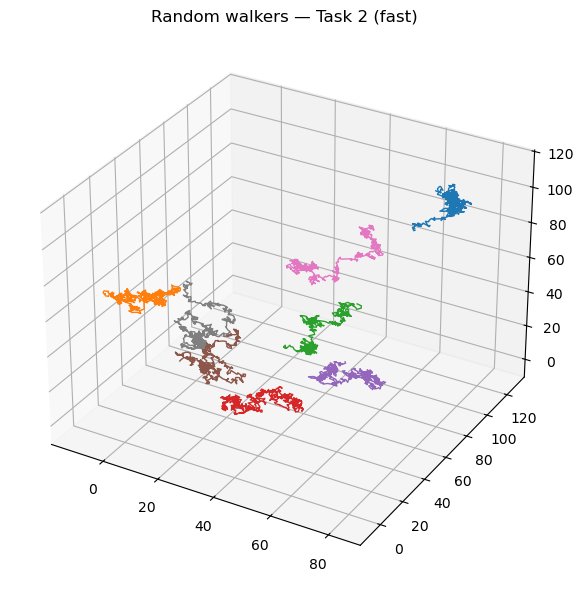

In [71]:
from main import task2, plot_paths_task2
task2()              # prints/returns shape
plot_paths_task2()   # renders Task 2 figure

## Topic 2, Task 3

Treat each atom as a ball with radius r_i + r_p (atom radius + probe radius).

Those balls mark blocked space; everything else in a box around the DNA is accessible.

Throw N random points in the box and count how many land inside any blocked ball -> fraction p.

Accessible volume = box volume × (1 − p).

I also report an standard error using the usual Monte-Carlo formula $\sqrt{\frac{p(1-p)}{N}}$​.

## Topic 2, Task 4 

1. Known case, i tested one atom(a single sphere). The MonteCarlo estimate matched the exact volume within the 95 % confidential interval (z = 0.65), (see test 1).

2. As N increased (100 k -> 200 k -> 500 k), the standard error decreased ≈ 1/√N, while the point estimates remained stable, indicating convergence. (See test 2)

3. As i increased the probe radius 0.0 -> 1.0 -> 1.4 -> 2.0 (r_p), the blocked volume went up (so accessible volume would go down),  (See test 3)

4. Changing the padding around the molecule didn't change the blocked volume beyond the Monte-Carlo error bar (standard error).(See test 4)


TEST 1 (Single sphere)

In [85]:

from montecarlo import _sphere_test
V_mc, V_true, z = _sphere_test(r=10.0, L=100.0, n=300_000, rp=0.0)
print("Single sphere:", "Volume_mc:",V_mc,"Volume_true:", V_true, "z:",z)


Single sphere: Volume_mc: 4266.666666666667 Volume_true: 4188.790204786391 z: 0.6544115551124411


TEST 2 (Increase N)

In [77]:
from montecarlo import accessible_volume_mc
for N in [100_000, 200_000, 500_000]:
    V, SE, _ = accessible_volume_mc(coords, radii, rp=1.4, n=N, pad=2.0)
    print(f"N={N:>7,d}  V={V:,.2f}  SE={SE:.2f}")


N=100,000  V=21,776.65  SE=29.85
N=200,000  V=21,727.88  SE=21.21
N=500,000  V=21,756.88  SE=13.38


TEST 3(Increase the probe radius)

In [87]:
rows = []
for rp in [0.0, 1.0, 1.4, 2.0]:
    V, SE, box = accessible_volume_mc(coords, radii, rp=rp, n=200_000, pad=2.0)
    (xmin,xmax),(ymin,ymax),(zmin,zmax) = box
    V_box = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)
    frac     = V / V_box
    se_frac  = SE / V_box
    rows.append((rp, frac, se_frac))


print(f"{'rp (Å)':<6}  {'Accessible frac':<16}  {'SE(frac)':<8}")
for rp, frac, se in rows:
    print(f"{rp:>4.1f}    {frac:>0.6f}            {se:0.6f}")

rp (Å)  Accessible frac   SE(frac)
 0.0    0.909335            0.000642
 1.0    0.856825            0.000783
 1.4    0.839525            0.000821
 2.0    0.822345            0.000855


TEST 4 (Changing the padding)

In [92]:

from montecarlo import blocked_volume_mc

Vb1, SE1, _ = blocked_volume_mc(coords, radii, rp=1.4, n=200_000, pad=2.0)
Vb2, SE2, _ = blocked_volume_mc(coords, radii, rp=1.4, n=200_000, pad=8.0)

delta = abs(Vb2 - Vb1)
SEavg = 0.5*(SE1 + SE2)
print("|Vb2 - Vb1| = ",delta, "SE(avg) = 0.5*(SE1 + SE2):",2*SEavg, "OK" if delta <= 2*SEavg else "check")



|Vb2 - Vb1| =  12.88633561161987 SE(avg) = 0.5*(SE1 + SE2): 58.466540258204446 OK


## Topic 2, Task 5

In [ ]:
from montecarlo import dna_accessible_volume

V_acc, SE_acc, box = dna_accessible_volume("dna_coords.txt", rp=1.4, n=2_000_000, pad=2.0)

# Unpack box and derive extras
(xmin, xmax), (ymin, ymax), (zmin, zmax) = box
V_box = (xmax - xmin) * (ymax - ymin) * (zmax - zmin)
frac = V_acc / V_box
ci_lo = V_acc - 1.96 * SE_acc
ci_hi = V_acc + 1.96 * SE_acc
rel_se = 100.0 * SE_acc / V_acc

print(f"Accessible volume (rp=1.4 Å): {V_acc:,.2f} Å³")
print(f"Standard error: {SE_acc:.2f} Å³  (relative {rel_se:.3f}%)")
print(f"95% CI: [{ci_lo:,.2f}, {ci_hi:,.2f}] Å³")
print(f"Box extents (Å): "
      f"x=({xmin:.5g}, {xmax:.5g}), "
      f"y=({ymin:.5g}, {ymax:.5g}), "
      f"z=({zmin:.5g}, {zmax:.5g})")
print(f"Box volume: {V_box:,.2f} Å³")
print(f"Accessible fraction: {frac:.6f}")



Accessible volume (rp=1.4 Å): 21,735.13 Å³
Standard error: 6.70 Å³  (relative 0.031%)
95% CI: [21,721.99, 21,748.26] Å³
Box extents (Å): x=(-53.381, -25.573), y=(-22.971, 7.7422), z=(-15.192, 15.097)
Box volume: 25,868.84 Å³
Accessible fraction: 0.840205
